
 Model Evaluation Complete!
R² Score: 0.9581
 RMSE: 0.9824

 Dataset Sample:
   Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  \
0           3.35           5.59       27000          2             0   
1           4.75           9.54       43000          1             0   
2           7.25           9.85        6900          2             0   
3           2.85           4.15        5200          2             0   
4           4.60           6.87       42450          1             0   

   Transmission  Owner  Car_Age  
0             1      0       11  
1             1      0       12  
2             1      0        8  
3             1      0       14  
4             1      0       11   

Dataset Shape: (301, 8)

 Plot saved to: Task-2-Car-Price-Prediction/results/actual_vs_predicted.png


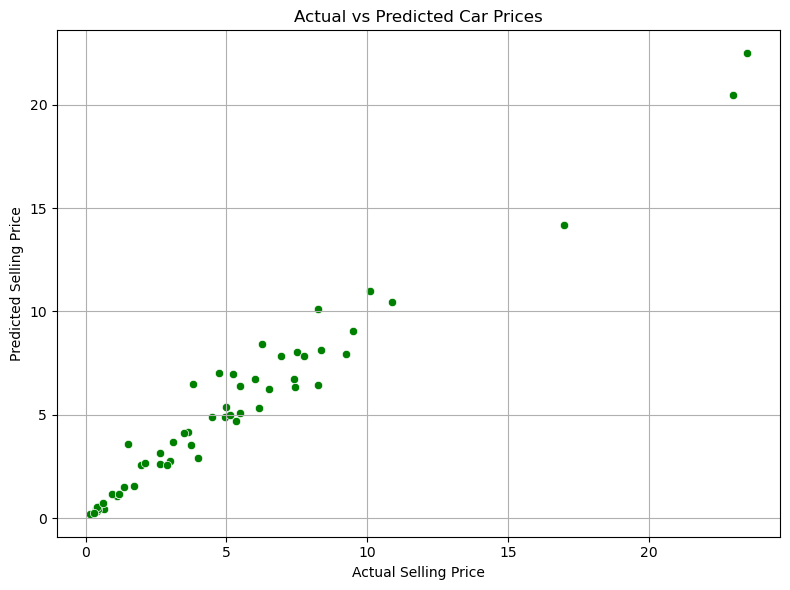

In [1]:
import sys
import io
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load dataset
df = pd.read_csv('car data.csv')

# Feature Engineering
df['Car_Age'] = 2025 - df['Year']
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

#  Encode Categorical Variables
le = LabelEncoder()
for col in ['Fuel_Type', 'Selling_type', 'Transmission']:
    df[col] = le.fit_transform(df[col])

#Features and Target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# 🧪 Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Model (Random Forest)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output Summary
print("\n Model Evaluation Complete!")
print("R² Score:", round(r2, 4))
print(" RMSE:", round(rmse, 4))

# Dataset Info
print("\n Dataset Sample:")
print(df.head(), "\n")
print("Dataset Shape:", df.shape)

# Save Plot
os.makedirs("Task-2-Car-Price-Prediction/results", exist_ok=True)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.tight_layout()
plot_path = "Task-2-Car-Price-Prediction/results/actual_vs_predicted.png"
plt.savefig(plot_path)
print(f"\n Plot saved to: {plot_path}")